# Übung 1: Diskretisierung

**Name:** DENİZ ÖZDEMİRLİ!, **Matr.-Nr.:** 190503029!
<br>
**Name:** DİLANUR GİDER!, **Matr.-Nr.:** 190503060!
<br>
**Name:** AYKAN BERKE SANDAL!, **Matr.-Nr.:** 190503012!
<br>
**Name:** MİTHAT CAN TURAN!, **Matr.-Nr.:** 190503021!

---

## Bearbeitungszeitraum

**Bearbeitungsbeginn:** 30.09.2022
<br>
**Abgabe:** 28.10.2022, 23:55 Uhr

---

## Aufgabenbeschreibung

Ziel dieser Übung ist die Einführung in die Bildverarbeitung mit Python. Sie sollen Bilder einlesen, visualisieren und konvertieren können. Zudem sollen Sie lernen, wie Farb-/Grauwerte eines Bildes manipuliert werden können. 
Sie sollen sich zur Bearbeitung dieser Aufgabe mit den bereits vorgestellten imaging libraries beschäftigen und sie einsetzen.

Für die Visualisierung kann das *matplotlib*-Paket verwendet werden. Alle Diagramme sollen *inline* in diesem Notebook ausgegeben werden. Alle interaktiven Inhalte sollen unter Venwendung der Funktionen des Pakets *ipywidgets* realisiert werden.


**Hinweise zur Abgabe**

- Füllen Sie unbedingt die erste Zelle unterhalb der Überschrift mit Name und Matrikelnummer aus!
- Entfernen Sie vor dem Upload alle Ausgaben aus dem Notebook!
- Die Bilddatei muss nicht abgegeben werden.


### Viel Erfolg!

### 1. Einlesen, Visualisierung und Konvertierung 
- 1.1. Lesen sie die Datei "Schwarm.jpg" ein.
Visualisieren Sie das, in der Datei enthaltene Bild (verwenden Sie die Funktionen `imshow` und `show`). Optional kann auch die cv2.imread-Funktion benutzt werden.
- 1.2. Führen Sie eine einfache, Schwellwert-basierte Konvertierung des Originalbildes durch, in dem Sie die `threshold`- Funktion (mit dem input value `cv2.THRESH_BINARY`) aus der `cv2`-Bibliothek verwenden. 
Visualisieren Sie beide Bilder mit Hilfe der `subplot`-Funktion in einer Zeile dar.
- 1.3. Analysieren Sie die Array-Werte des neu erzeugten Bildes. Was hat die Thresholding-Funktion bewirkt? Nach welchem Kriterium wurden die einzelnen Pixelwerte verändert? (Stichpunktartige Antwort)

***Anmerkung:*** Nachdem Sie bei der ersten Aufgabe BGR in ein GRAY-Bild umgewandelt haben, denken Sie dran plt.imshow(image, cmap='binary‘) zu setzen, damit das Bild nicht in gelb/lila dargestellt wird.

Original Image Array
 [[117 118 118 ... 128 115 255]
 [113 113 113 ... 126 114 254]
 [110 108 107 ... 125 113 253]
 ...
 [ 64  60  47 ...  70  46 255]
 [ 56  48  46 ...  72  46 254]
 [ 60  53  47 ...  76  47 251]]

Thresholded Image Array
 [[  0   0   0 ... 255   0 255]
 [  0   0   0 ...   0   0 255]
 [  0   0   0 ...   0   0 255]
 ...
 [  0   0   0 ...   0   0 255]
 [  0   0   0 ...   0   0 255]
 [  0   0   0 ...   0   0 255]]


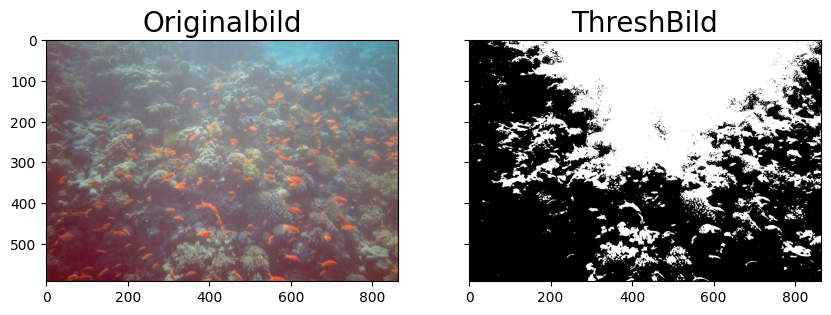

In [1]:
#import Bibliotheke
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open(r"Schwarm.jpg")
imageGray = cv2.imread('Schwarm.jpg',0)
img = np.asarray(imageGray)


#thresholding
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) 

#visualisieren
fig, axes = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Originalbild', fontsize=20)


ax[1].imshow(thresh1 , cmap='gray')
ax[1].set_title('ThreshBild', fontsize=20)

print('Original Image Array\n', img)
#print(np.asarray(image))
print('\nThresholded Image Array\n',thresh1)

 # 1.3:
 # Mit der Funktion thresh_binary() aus der opencv lib. ändern wir die Pixelwerte entsprechend unserem vorgegebenen Threshold. 
 # thresh_binary() nimmt ein Quellbild, einen Threshold-Wert und einen maximalen Pixelwert. Wenn der Wert eines Pixels höher 
 # als der Threshold-Wert ist, wird er auf den Maximalwert gerundet (in unserem Fall 255), und wenn er kleiner ist, wird er auf
 # 0 gesetzt. Unser Threshold-Wert ist 127 und der Maximalwert ist 255, da wir ein schwarz-weißes Binärbild erstellen wollen.



### 2. Binärbild erzeugen

**Interaktive Threshold-Eingabe** 

Das Ziel dieser Aufgabe ist es, aus dem farbigen "Schwarm.jpg" ein Binärbild (also ein s/w-Bild!) zu erzeugen, da Binärbilder die Grundvoraussetzung von vielen Bildverarbeitungsoperationen sind.
Bildverarbeitungsbibliotheken wie `scipy` bieten bereits robuste Schwellwert-basierte Funktionen, die Sie sich gerne anschauen und auch testweise anwenden können. 
Für diese Teilaufgabe sollten Sie jedoch einen Slider implementieren, über den ein Schwellenwert (Grenzen 0 und 255, Schrittweite 1, Standardwert 127) für eine Binärkonvertierung festgelegt werden kann. Konvertieren Sie Originalbild unter Verwendung des Schwellenwertes in ein Binärbild. Eine einfache Konvertierung kann durch folgende Zeile erreicht werden: binary_image = (image >= schwellenwert) * 1. 

***Hinweis:*** 
Nutzen Sie die Funktionen zur Erstellung einer interaktiven Visualisierung aus dem ipywidgets-Paket (siehe auch Demo-Notebook -> Beispiel Gauss-Filter).

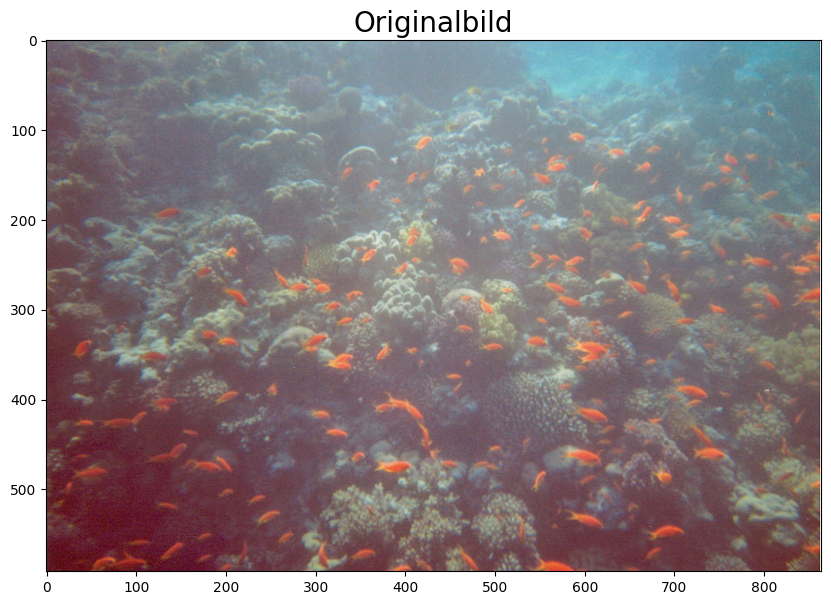

interactive(children=(IntSlider(value=127, description='x', max=255), Output()), _dom_classes=('widget-interac…

In [2]:
#import Bibliotheke
import cv2
from io import BytesIO
from IPython.display import Image
import matplotlib as mpl

from ipywidgets import interact,widgets
import numpy as np
from PIL import Image as IM
import matplotlib.pyplot as plt

image = IM.open(r"Schwarm.jpg")
imageGray = cv2.imread('Schwarm.jpg',0)
img = np.asarray(imageGray)


#thresholding

#visualisieren
fig, axes = plt.subplots(1, 1, figsize=(10, 10), sharex=True, sharey=True)

axes.imshow(image, cmap=plt.cm.gray)
axes.set_title('Originalbild', fontsize=20)




#print('Original Image Array\n', img)
#print(np.asarray(image))
#print('\nThresholded Image Array\n',thresh1)
def arr2img(arr):
    if arr.ndim == 2:
        format, cmap = 'png', mpl.cm.gray
    elif arr.ndim == 3:
        format, cmap = 'jpg', None
    else:
        raise ValueError("Only 2- or 3-d arrays can be displayed as images.")
    vmax = 255 if arr.dtype == 'uint8' else 1.0
    with BytesIO() as buffer:
        mpl.image.imsave(buffer, arr, format=format, cmap=cmap, vmin=0, vmax=vmax)
        out = buffer.getvalue()
        
    return Image(out)


imageSlide = img

def f(x):
    ret,thresh1 = cv2.threshold(img,x,255,cv2.THRESH_BINARY) 
    return arr2img(thresh1)




interact(f, x=widgets.IntSlider(min=0, max=255, step=1, value=127));


### 3. Diskretisierung

Bearbeiten Sie das Originalbild "Schwarm.jpg", indem Sie folgende Operationen durchführen:

- 3.1. Anzahl der Graustufen reduzieren (4 Stufen: 128, 64, 32, 16). Nehmen Sie hier als Ausgangsbild das Grauwert-transformierte Originalbild.
- 3.2. Anzahl der Bildpunkte reduzieren (512x512, 256x256, 128x128, 32x32) 
- 3.2. Anzahl der Farbstufen reduzieren (in 4 Stufen)

Visualisieren Sie diese Teilaufgaben jeweils mit Hilfe der `subplot`-Funktion in einem 2x2-Raster.

***Hinweis:*** 
- Es ist Ihnen überlassen, welche Libraries bzw. welche Funktionen Sie hierfür verwenden. Wichtig ist, dass Sie die Vorgehensweise der eingesetzten Algorithmen nachvollziehen und wiedergeben können!
- Beschreiben Sie bei jeder Teilaufgabe den Ablauf Ihres Algorithmus (stichpunktartige Wiedergabe reicht aus)
- Sie dürfen auch die, in der Vorlesung vorgestellten Algorithmen `Fehlerdiffusion` und `Median Cut` einsetzen, um vorallem eine Grau-/Farbwertreduktion durchzuführen

Text(0.5, 1.0, 'Graustufen - 16')

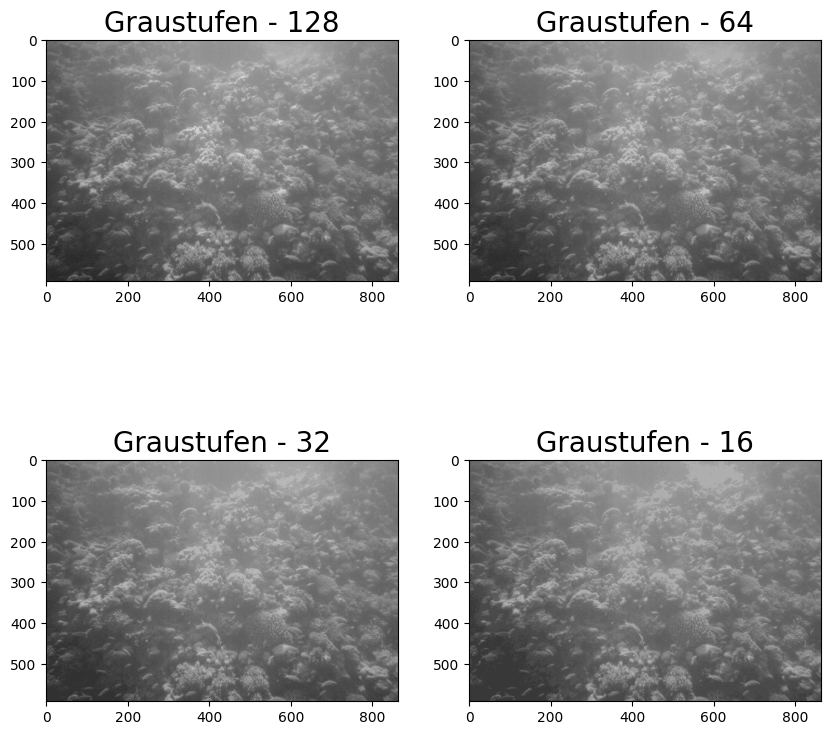

In [3]:
#import Bibliotheke
import cv2
from io import BytesIO
from IPython.display import Image

from ipywidgets import interact,widgets
import numpy as np
from PIL import Image as IM
import matplotlib.pyplot as plt

image = IM.open(r"Schwarm.jpg").convert('L')
qu = image.quantize(32)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.ravel()

img128 = image.quantize(2**7)
img64 = image.quantize(2**6)
img32 = image.quantize(2**5)
img16 = image.quantize(2**4)

ax[0].imshow(img128)
ax[0].set_title('Graustufen - 128', fontsize=20)
ax[1].imshow(img64)
ax[1].set_title('Graustufen - 64', fontsize=20)
ax[2].imshow(img32)
ax[2].set_title('Graustufen - 32', fontsize=20)
ax[3].imshow(img16)
ax[3].set_title('Graustufen - 16', fontsize=20)



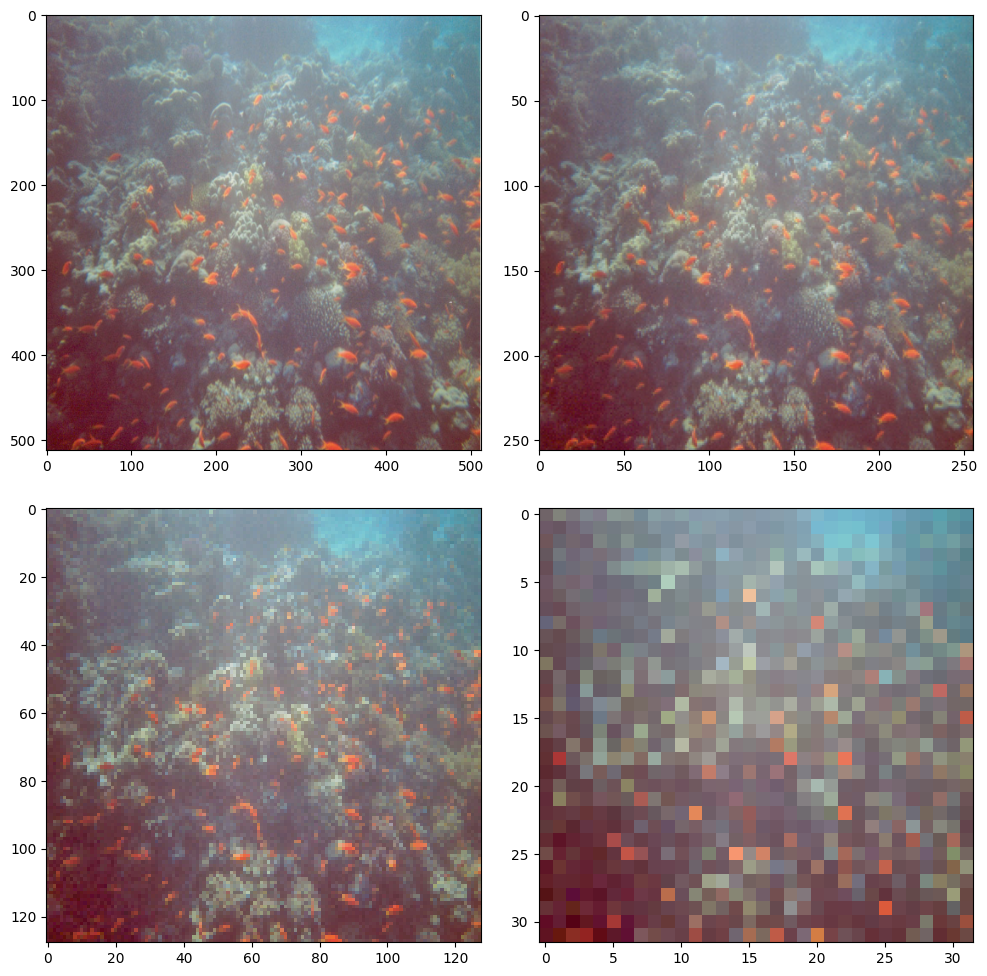

In [4]:

im = IM.open(r'Schwarm.jpg')
im = np.asarray(im)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.ravel()


fig.tight_layout()
img512 = cv2.resize(im,(512,512))
img256 = cv2.resize(im,(256,256))
img128 = cv2.resize(im,(128,128))
img32 = cv2.resize(im,(32,32))
ax[0].imshow(img512)
ax[1].imshow(img256)
ax[2].imshow(img128)
ax[3].imshow(img32)




Text(0.5, 1.0, 'Farbstufen - 128')

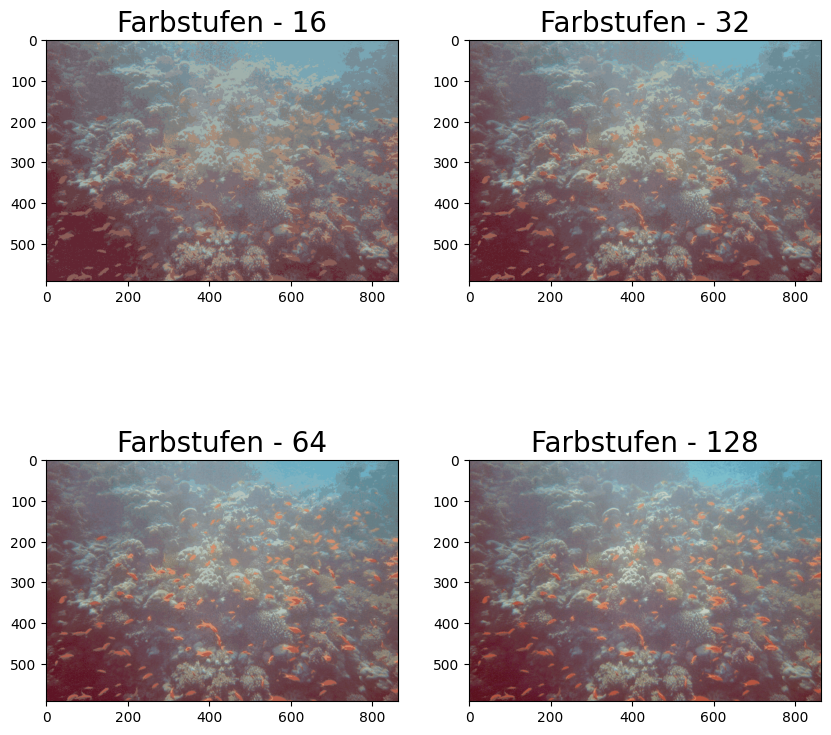

In [5]:
#import Bibliotheke
import cv2
from io import BytesIO
from IPython.display import Image


from skimage.io import imread

from ipywidgets import interact,widgets
import numpy as np
from PIL import Image as IM
import matplotlib.pyplot as plt



sample_img = imread('Schwarm.jpg')



def median_cut_quantize(img, img_arr):
    # when it reaches the end, color quantize
    # print("to quantize: ", len(img_arr))
    r_average = np.mean(img_arr[:,0])
    g_average = np.mean(img_arr[:,1])
    b_average = np.mean(img_arr[:,2])
    
    for data in img_arr:
        sample_img[data[3]][data[4]] = [r_average, g_average, b_average]
    
def split_into_buckets(img, img_arr, depth):
    
    if len(img_arr) == 0:
        return 
        
    if depth == 0:
        median_cut_quantize(img, img_arr)
        return
    
    r_range = np.max(img_arr[:,0]) - np.min(img_arr[:,0])
    g_range = np.max(img_arr[:,1]) - np.min(img_arr[:,1])
    b_range = np.max(img_arr[:,2]) - np.min(img_arr[:,2])
    
    space_with_highest_range = 0

    if g_range >= r_range and g_range >= b_range:
        space_with_highest_range = 1
    elif b_range >= r_range and b_range >= g_range:
        space_with_highest_range = 2
    elif r_range >= b_range and r_range >= g_range:
        space_with_highest_range = 0

    #print("space_with_highest_range:",space_with_highest_range)

    # sort the image pixels by color space with highest range 
    # and find the median and divide the array.
    img_arr = img_arr[img_arr[:,space_with_highest_range].argsort()]
    median_index = int((len(img_arr)+1)/2)
    #print("median_index:", median_index)

    
    #split the array into two buckets along the median
    split_into_buckets(img, img_arr[0:median_index], depth-1)
    split_into_buckets(img, img_arr[median_index:], depth-1)
    
flattened_img_array = []
for rindex, rows in enumerate(sample_img):
    for cindex, color in enumerate(rows):
        flattened_img_array.append([color[0],color[1],color[2],rindex, cindex]) 
        
flattened_img_array = np.array(flattened_img_array)


# the 3rd parameter represents how many colors are needed in the power of 2. If the parameter 
# passed is 4 its means 2^4 = 16 colors

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
ax = axes.ravel()

split_into_buckets(sample_img, flattened_img_array, 4)
ax[0].imshow(sample_img)
ax[0].set_title('Farbstufen - 16', fontsize=20)


split_into_buckets(sample_img, flattened_img_array, 5)
ax[1].imshow(sample_img)
ax[1].set_title('Farbstufen - 32', fontsize=20)

split_into_buckets(sample_img, flattened_img_array, 6)
ax[2].imshow(sample_img)
ax[2].set_title('Farbstufen - 64', fontsize=20)


split_into_buckets(sample_img, flattened_img_array, 7)
ax[3].imshow(sample_img)
ax[3].set_title('Farbstufen - 128', fontsize=20)
